# What's the data like?

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import os, dotenv
project_path = os.path.dirname(dotenv.find_dotenv())

In [2]:
"""
load data
"""

df = pd.read_csv(project_path + '/data/raw/data.csv', index_col=0)
df.head()

,index,time,volumeto,high,close,low,volumefrom,open
0,0,1522735200,31781728.52,7380.88,7353.98,7331.62,4307.81,7350.19
1,1,1522738800,42859012.38,7444.15,7416.72,7341.30,5775.70,7353.98
2,2,1522742400,33819277.06,7425.92,7368.47,7358.59,4550.36,7415.94
3,3,1522746000,22387339.74,7404.55,7385.53,7351.84,3017.73,7366.81
4,4,1522749600,41717522.90,7410.70,7326.43,7297.24,5667.16,7385.53


In [3]:
"""
descriptive stats
"""
df.describe()

,index,time,volumeto,high,close,low,volumefrom,open
count,46023.000000,4.602300e+04,4.602300e+04,46023.000000,46023.000000,46023.000000,4.602300e+04,46023.000000
mean,1000.000000,1.447135e+09,8.692781e+06,1913.532345,1895.409405,1877.357780,3.231736e+03,1895.343771
std,577.645148,4.780517e+07,2.893823e+07,3302.153568,3276.079788,3247.291201,5.961334e+04,3275.949490
min,0.000000,1.364335e+09,0.000000e+00,50.350000,48.250000,5.760000,0.000000e+00,50.350000
25%,500.000000,1.405737e+09,9.738386e+04,278.850000,277.195000,275.730000,1.849900e+02,277.150000
50%,1000.000000,1.447135e+09,5.975575e+05,553.610000,545.320000,536.810000,1.411420e+03,545.450000
75%,1500.000000,1.488533e+09,3.345405e+06,1154.460000,1101.310000,1074.110000,3.036335e+03,1100.000000
max,2000.000000,1.529935e+09,2.305670e+09,19870.620000,19784.930000,19691.740000,8.410600e+06,19784.930000


In [4]:
"""
Check shape and confirm that no NA values are present
"""
df.dropna().shape == df.shape, df.shape

(True, (46023, 8))

In [5]:
"""
Number of unique timepoints
"""
df.time.unique().shape

(46001,)

In [6]:
"""
Take a small sample for plotting
"""
sample = df.sample(n=1000, replace=False)

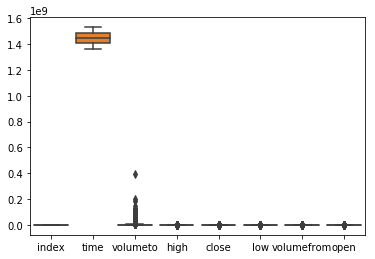

In [7]:
"""
Check relative distribution of data features
"""
sns.boxplot(data=sample)

"\nNote: Something wrong with display of X-axis dates here ... I've confirmed dates are correct in dataframe. strange.\nAlso current/past price makes sense on this chart.\n"

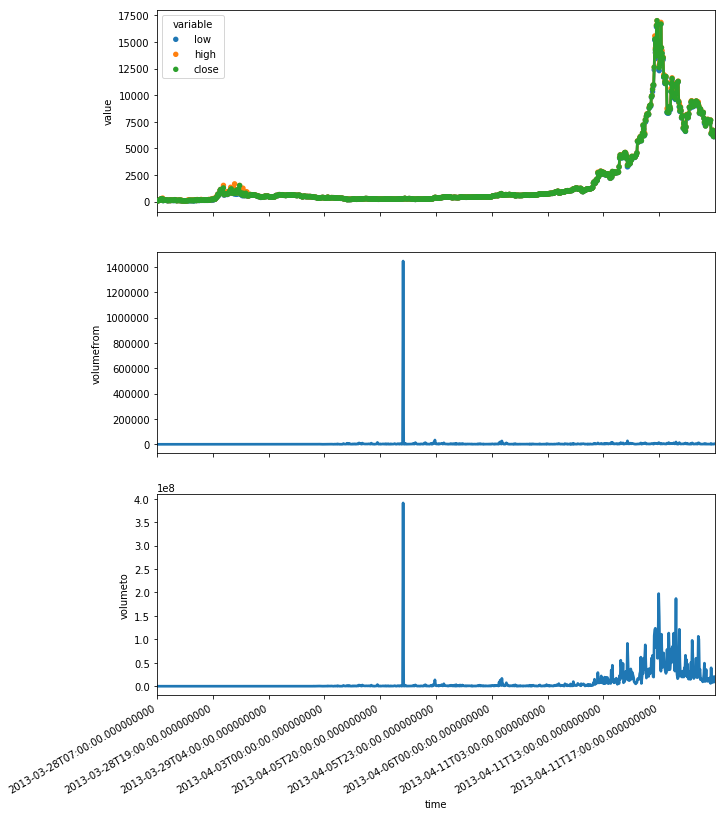

In [8]:
"""
Plot data features against time. Making sure that the data set was created correctly / sanity check.
"""

pltdata = sample.copy()
pltdata.time = pd.to_datetime(pltdata.time, unit='s')


fig, ax = plt.subplots(3, sharex=True)
fig.set_size_inches((10,14))
for a in ax:
    a.xaxis_date()

pricedata = pd.melt(sample, id_vars='time', value_vars=['low', 'high', 'close'])
sns.pointplot(ax=ax[0], data=pricedata, x='time', y='value', hue='variable', linestyles='-', markers='.')
sns.pointplot(ax=ax[1], data=pltdata, x='time', y='volumefrom', linestyles='-', markers='')
sns.pointplot(ax=ax[2], data=pltdata, x='time', y='volumeto', linestyles='-', markers='')
locs, labels = plt.xticks()
plt.xticks([locs[x*100] for x in range(int(len(locs) / 100))])
fig.autofmt_xdate()

"""
Note: Something wrong with display of X-axis dates here ... I've confirmed dates are correct in dataframe. strange.
Also current/past price makes sense on this chart.
""" 

In [9]:
"""
Dates go until 2018 and are mostly unique.
"""
pd.to_datetime(df.time.unique(), unit='s')

DatetimeIndex(['2018-04-03 06:00:00', '2018-04-03 07:00:00',
               '2018-04-03 08:00:00', '2018-04-03 09:00:00',
               '2018-04-03 10:00:00', '2018-04-03 11:00:00',
               '2018-04-03 12:00:00', '2018-04-03 13:00:00',
               '2018-04-03 14:00:00', '2018-04-03 15:00:00',
               ...
               '2013-06-17 20:00:00', '2013-06-17 21:00:00',
               '2013-06-17 22:00:00', '2013-06-17 23:00:00',
               '2013-06-18 00:00:00', '2013-06-18 01:00:00',
               '2013-06-18 02:00:00', '2013-06-18 03:00:00',
               '2013-06-18 04:00:00', '2013-06-18 05:00:00'],
              dtype='datetime64[ns]', length=46001, freq=None)